# Module 4 Lab Notebook: Data Visualization with Python (Matplotlib + Seaborn)

**Course:** Introduction to Data Science and Python  
**Module 4:** Data Visualization  
**Estimated Time:** 90–120 minutes  

## 🎯 Lab Goals
By the end of this lab, you will be able to:
- Create common plots using **Matplotlib** (line, bar, scatter, histogram)
- Create statistical graphics using **Seaborn** (boxplot, heatmap)
- Apply visualization best practices (titles, labels, readability)
- Use visualizations to identify trends and outliers in cybersecurity-style data

## 📁 Files for this Lab
- Dataset: `module4_cyber_events.csv` (provided in this module)


## ✅ Step 0: Setup

Run the cell below to import libraries. If you get an import error, review Module 0 (libraries install).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve plot readability
plt.rcParams["figure.figsize"] = (10, 5)

print("Libraries loaded successfully.")

Libraries loaded successfully.


## ✅ Step 1: Load the Dataset

1. Make sure `module4_cyber_events.csv` is in the same folder as this notebook.
2. Load it into a DataFrame and preview the first rows.

In [4]:
df = pd.read_csv("module4_cyber_events.csv")
df.head()

,timestamp,source_ip,event_type,severity,dest_port,packet_bytes
0,2024-02-01 00:00:00,10.0.0.18,malware_alert,10,22,1223
1,2024-02-01 01:00:00,10.0.0.23,login_success,3,53,1120
2,2024-02-01 02:00:00,10.0.0.22,dns_query,1,443,863
3,2024-02-01 03:00:00,10.0.0.4,port_scan,8,8080,1336
4,2024-02-01 04:00:00,10.0.0.24,login_failed,4,3389,244


## ✅ Step 2: Quick Exploration

Use `.info()` and `.describe()` to understand columns, missing values, and data ranges.

In [18]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     200 non-null    datetime64[ns]
 1   source_ip     200 non-null    object        
 2   event_type    200 non-null    object        
 3   severity      200 non-null    int64         
 4   dest_port     200 non-null    int64         
 5   packet_bytes  200 non-null    int64         
 6   date          200 non-null    object        
 7   hour          200 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 11.8+ KB


,timestamp,source_ip,event_type,severity,dest_port,packet_bytes,date,hour
count,200,200,200,200.000000,200.000000,200.000000,200,200.000000
unique,NaN,29,5,NaN,NaN,NaN,9,NaN
top,NaN,10.0.0.28,login_success,NaN,NaN,NaN,2024-02-01,NaN
freq,NaN,14,73,NaN,NaN,NaN,24,NaN
mean,2024-02-05 03:30:00.000000256,NaN,NaN,4.035000,1494.985000,794.520000,NaN,11.180000
min,2024-02-01 00:00:00,NaN,NaN,1.000000,22.000000,70.000000,NaN,0.000000
25%,2024-02-03 01:45:00,NaN,NaN,2.000000,23.000000,476.000000,NaN,5.000000
50%,2024-02-05 03:30:00,NaN,NaN,3.000000,443.000000,788.500000,NaN,11.000000
75%,2024-02-07 05:15:00,NaN,NaN,6.000000,445.000000,1144.750000,NaN,17.000000
max,2024-02-09 07:00:00,NaN,NaN,10.000000,8080.000000,1497.000000,NaN,23.000000


## ✅ Step 3: Prepare Time Data

Convert the `timestamp` column into a datetime type. Then create two helper columns:
- `date` (YYYY-MM-DD)
- `hour` (0–23)

In [22]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour

df[["timestamp", "date", "hour"]].head()

,timestamp,date,hour
0,2024-02-01 00:00:00,2024-02-01,0
1,2024-02-01 01:00:00,2024-02-01,1
2,2024-02-01 02:00:00,2024-02-01,2
3,2024-02-01 03:00:00,2024-02-01,3
4,2024-02-01 04:00:00,2024-02-01,4


# Part A — Matplotlib Plots

## ✅ Step 4: Line Plot (Trend Over Time)

Create a line chart showing **count of events per hour**.

**Hint:** group by `timestamp` (or resample) and count rows.

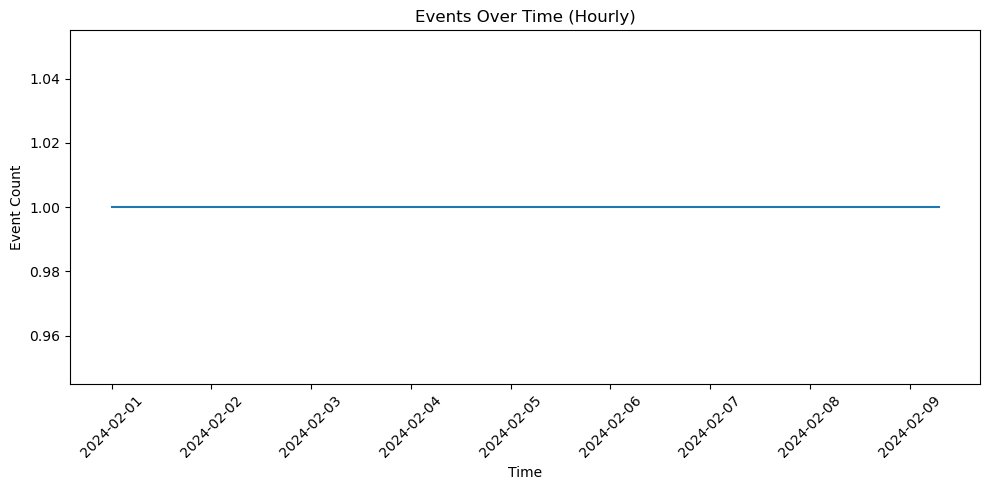

In [24]:
events_per_hour = df.set_index("timestamp").resample("h").size()

plt.plot(events_per_hour.index, events_per_hour.values)
plt.title("Events Over Time (Hourly)")
plt.xlabel("Time")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✅ Step 5: Bar Chart (Events by Type)

Create a bar chart showing the **number of events per event_type**.

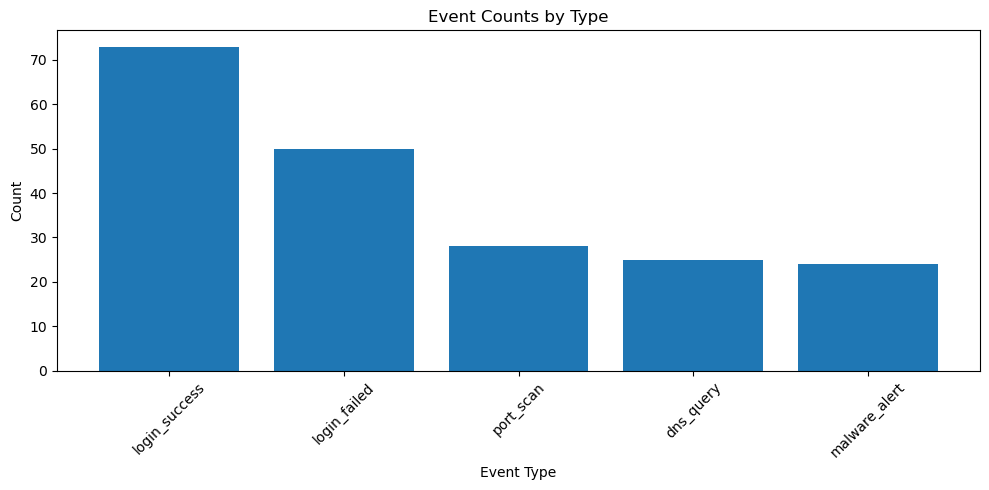

In [11]:
counts_by_type = df["event_type"].value_counts()

plt.bar(counts_by_type.index, counts_by_type.values)
plt.title("Event Counts by Type")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✅ Step 6: Histogram (Distribution of Packet Size)

Create a histogram of `packet_bytes` to understand its distribution.

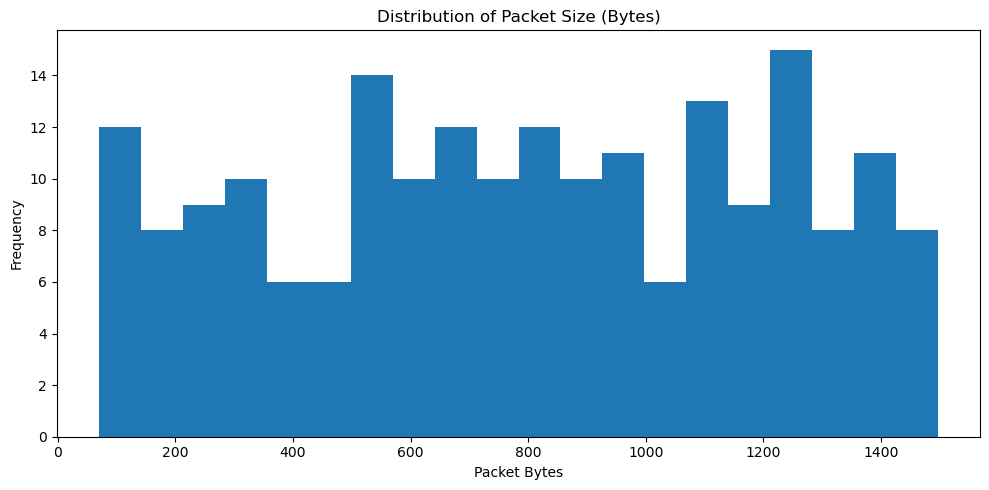

In [12]:
plt.hist(df["packet_bytes"], bins=20)
plt.title("Distribution of Packet Size (Bytes)")
plt.xlabel("Packet Bytes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## ✅ Step 7: Scatter Plot (Severity vs Packet Size)

Create a scatter plot where:
- X = `packet_bytes`
- Y = `severity`

Then answer in a Markdown cell:
- Do you see any pattern? Any outliers?

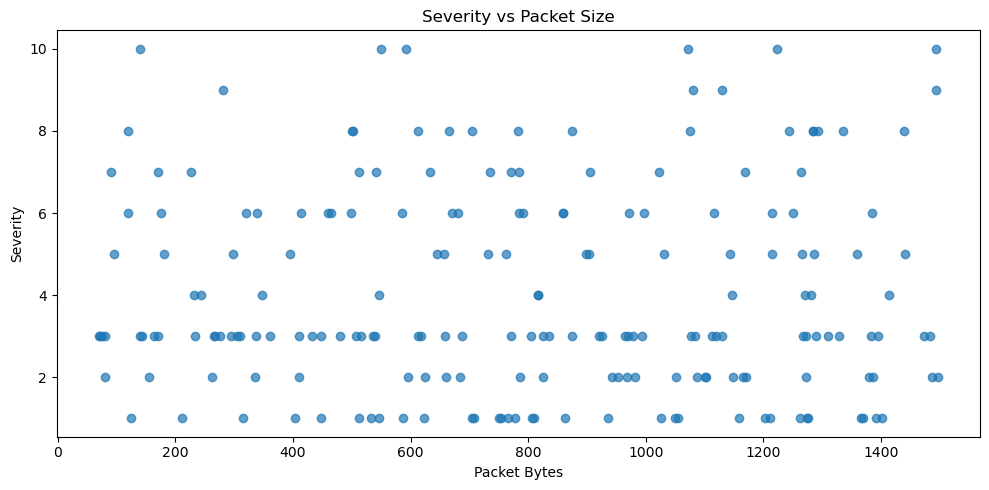

In [13]:
plt.scatter(df["packet_bytes"], df["severity"], alpha=0.7)
plt.title("Severity vs Packet Size")
plt.xlabel("Packet Bytes")
plt.ylabel("Severity")
plt.tight_layout()
plt.show()

**Your observation (write below):**  
- Pattern:  
- Outliers:  


# Part B — Seaborn Statistical Graphics

## ✅ Step 8: Boxplot (Severity by Event Type)

Create a Seaborn boxplot of `severity` grouped by `event_type`.

Goal: identify which event types tend to have higher severity and where outliers appear.

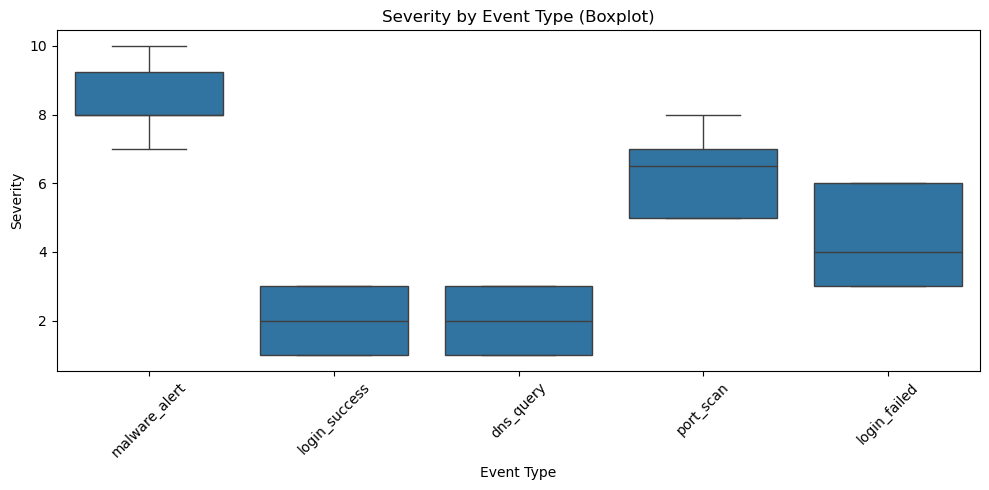

In [17]:
sns.boxplot(data=df, x="event_type", y="severity")
plt.title("Severity by Event Type (Boxplot)")
plt.xlabel("Event Type")
plt.ylabel("Severity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✅ Step 9: Heatmap (Correlation)

Compute correlations for numeric columns and display a heatmap.

**Tip:** Use `df.select_dtypes("number")` to isolate numeric columns.

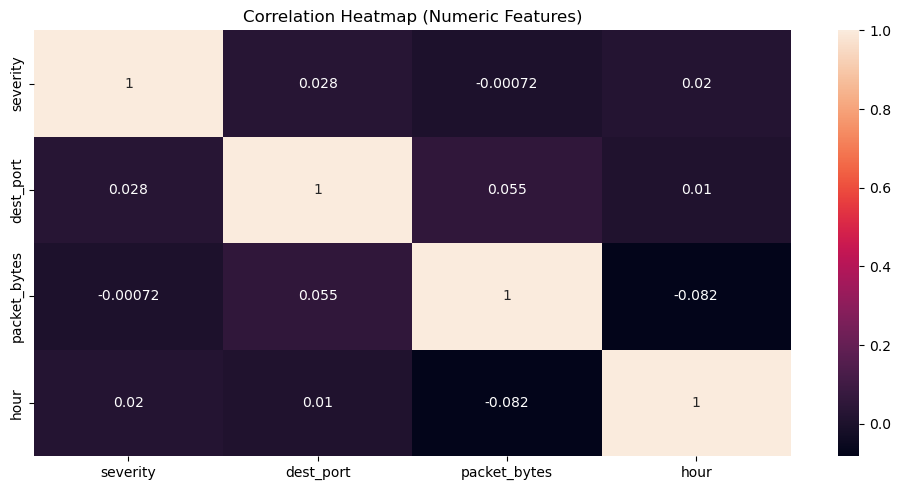

In [15]:
numeric_df = df.select_dtypes("number")
corr = numeric_df.corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

# Part C — Mini Dashboard (3 Visuals)

## ✅ Step 10: Create a Simple Dashboard

Create **three visuals** that would help someone quickly understand security activity.

Minimum requirements:
1. Trend over time (line)
2. Breakdown by type (bar or countplot)
3. Distribution or outliers (histogram or boxplot)

**Instruction:** Put all three plots in sequence below with short titles and clear labels.

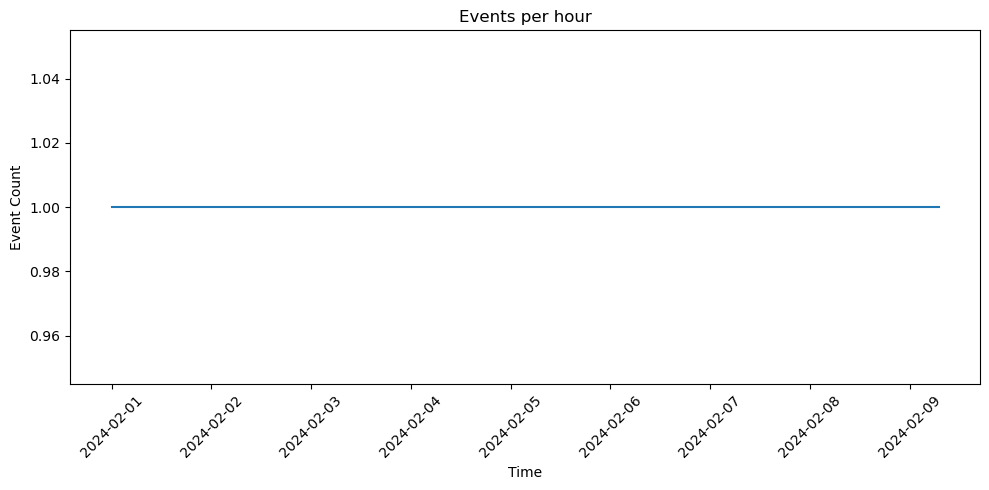

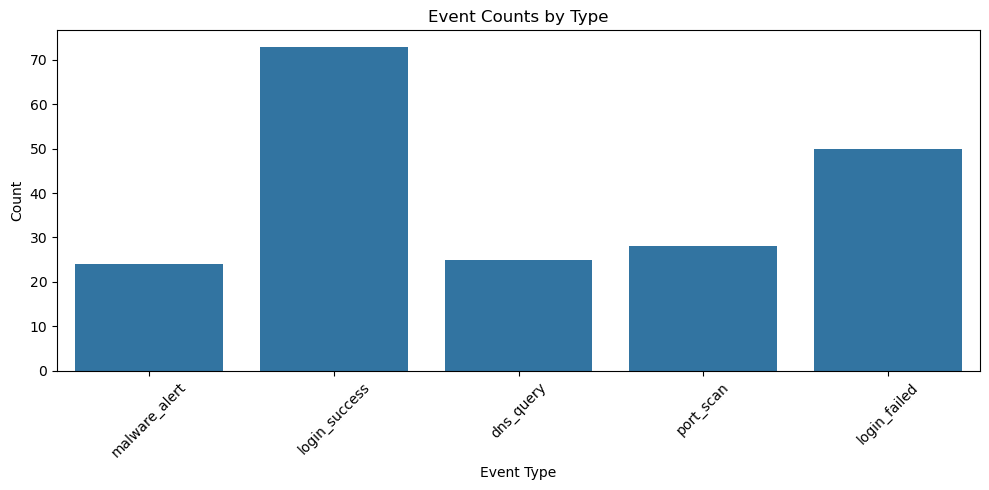

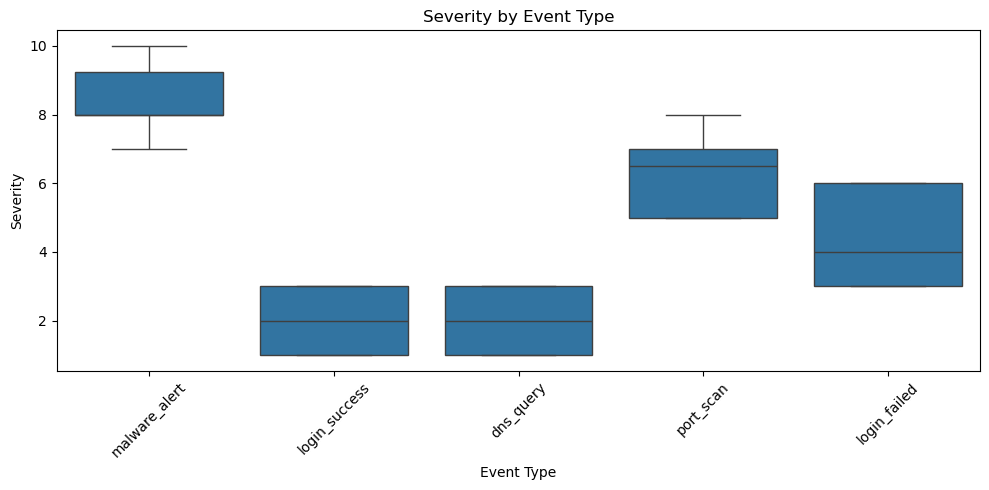

In [25]:
# Dashboard Visual 1: Trend over time
events_per_hour = df.set_index("timestamp").resample("h").size()
plt.plot(events_per_hour.index, events_per_hour.values)
plt.title("Events per hour")
plt.xlabel("Time")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dashboard Visual 2: Events by type
sns.countplot(data=df, x="event_type")
plt.title("Event Counts by Type")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dashboard Visual 3: Outliers / distribution
sns.boxplot(data=df, x="event_type", y="severity")
plt.title("Severity by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Severity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✍️ Reflection (Required)

Answer each question in 1–3 sentences:

1. Which visualization was most useful for identifying patterns or anomalies? Why?  Scatter plot because its going to show you the most individual events, and compare those with 2 different data types.
2. What improvement would you make if presenting these visuals to a non-technical stakeholder? Give aliases they can understand, or more descriptive titles. 
3. How could visualization support faster or more accurate security decisions? clearly points out outliers.

## ✅ What to Submit

1. Your completed notebook saved as: `Module4_VisualizationLab_LastName.ipynb`  
2. Make sure all charts render correctly before submitting.

If you get an error, include a short note at the bottom describing:
- what you tried
- the exact error message
